## Need for Implicit Feedback

# New Section

Typically, when building recommender systems, we focus on users explicitly rating items. In simpler terms, users give a score to something, and the system predicts how much they would like it.

The problem with this approach is that it treats unrated items as if the user has no opinion about them. In reality, if a user actively decides not to watch a movie, they won't provide a rating for it. Think about it: if you don't like a movie, you simply won't rate it.

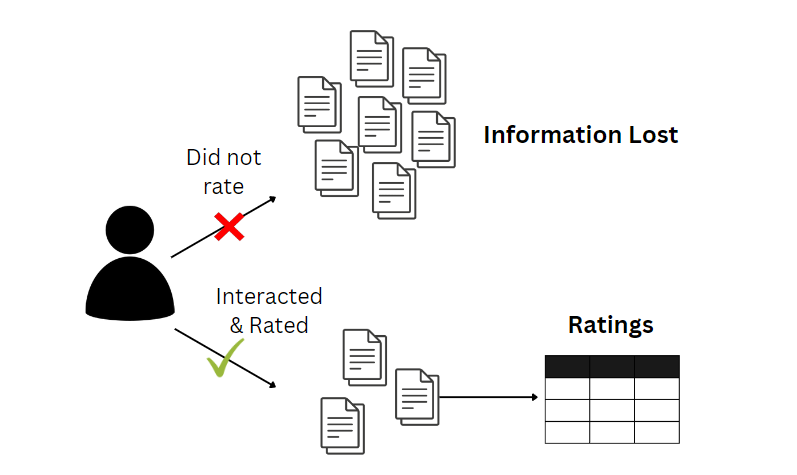

Implicit feedback comes into play here. Instead of relying solely on explicit ratings, we aim to capture users' subtle choices. Essentially, we assume that if a user hasn't rated a movie, it's more likely because they didn't enjoy it. This viewpoint gives us extra valuable information to improve our recommender systems.

Now, let's explore how we can train recommender systems using implicit feedback.

We will be using the LightFM package for modelling implicit feedback.
<font size=1>https://github.com/lyst/lightfm</font>

In [ ]:
!pip install lightfm

In [ ]:
import numpy as np

from lightfm.datasets import fetch_movielens

movielens = fetch_movielens()

#Getting the train and test split of the movie lens dataset

train = movielens['train']
test = movielens['test']

One way to achieve implicit feedback is by training using the Bayesian Personalised Ranking pairwise loss (BPR).

The idea of BPR is that we want to maximise the distance between the positive examples and randomly sampled negative examples. It is used when we only have positive ratings and our objective is to optimize for ROC-AUC

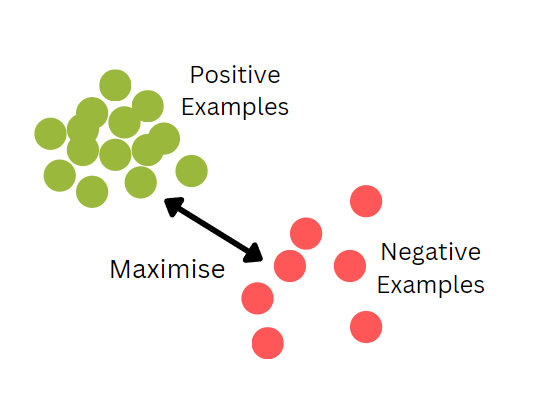

You can learn more about BPR using this link http://ethen8181.github.io/machine-learning/recsys/4_bpr.html

In [ ]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

#Initializing the lightfm model with BPR
model = LightFM(learning_rate=0.05, loss='bpr')
model.fit(train, epochs=10)

#Calculating the train and test precision
train_precision = precision_at_k(model, train, k=10).mean()
test_precision = precision_at_k(model, test, k=10).mean()

#Calculating the train and test auc
train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()

print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Precision: train 0.59, test 0.10.
AUC: train 0.90, test 0.86.


Other method is Weighted Approximate-Rank Pairwise loss (WARP).

Unlike BPR, WARP maximises the ranking of the positive example with a negative example. Here the negative samples are chosen which will violate the ranking order of the positive samples.

Which means, we randomly select a negative sample, then we get the prediction score. If the prediction score is higher than the positive sample (i.e. violates the ranking order) then we perform a gradient step.

WARP is used when we want to optimize for Precision@k.

You can learn more about WARP using this link http://ethen8181.github.io/machine-learning/recsys/5_warp.html


In [ ]:
#Initializing the lightfm model with WARP
model = LightFM(learning_rate=0.05, loss='warp')
model.fit_partial(train, epochs=10)

#Calculating the train and test precision
train_precision = precision_at_k(model, train, k=10).mean()
test_precision = precision_at_k(model, test, k=10).mean()

#Calculating the train and test auc
train_auc = auc_score(model, train).mean()
test_auc = auc_score(model, test).mean()

print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))

Precision: train 0.61, test 0.11.
AUC: train 0.94, test 0.90.
